# Bar Chart Plots

Express the cars.data.csv data as a series of bar graphs.  The x-axis represents a feature and the y-axis is the frequency in the sample.  Do this with the 'buying', 'maint', 'safety', and 'doors' fields with one plot for each for a total of four.  Make each graph a subplot of a single output. 

In [7]:
import requests
import csv
import pandas 
import Tkinter
import tkFileDialog
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

#buying       v-high, high, med, low
#maint        v-high, high, med, low
#doors        2, 3, 4, 5-more
#persons      2, 4, more
#lug_boot     small, med, big
#safety       low, med, high
#class        unacc, acc, good, vgood
    
s = raw_input('Use online csv file? y/n : ')

if s.lower() == 'y': 
    df = pandas.read_csv("https://raw.githubusercontent.com/ChristopheHunt/MSDA" + 
                         "---Coursework/master/Data%20602/" + 
                         "Data%20602%20-%20Advanced%20Programming/" + 
                         "data/cars.data.csv", 
                         header=None, index_col=False)
elif s.lower() == 'n':
    root = Tkinter.Tk()
    filename = tkFileDialog.askopenfilename(parent=root) 
    df = pandas.read_csv(filename)
    root.withdraw()
    
else: 
    print "input was not in a y/n format"

df.columns = [ 'buying', 'maint', 'doors','persons','lug_boot', 'safety', 'class']
df = df.apply(lambda df: df.astype('category')) 

safety_cat = ['low','med','high']
maint_cat = ['low','med','high','vhigh']
doors_cat = ['2','3','4','5more']

def columncheck(column, listvalues):
    check = list(set(pandas.unique(df[column].ravel())) - set(listvalues))
    if check != []:
       s = raw_input("%s column contains unexpected values:%s, this will be converted to NaN. Continue? y/n : " 
                     % (column, check))
       if s.lower() != 'y':
          sys.exit("End") 

columncheck('safety', safety_cat)
columncheck('maint', maint_cat)
columncheck('doors', doors_cat)

def setcat(column, listvalues):
    df[column].cat.set_categories(listvalues, inplace = True)
    
setcat('safety', safety_cat)
setcat('maint', maint_cat)
setcat('doors', doors_cat)

Use online csv file? y/n : y


In [9]:
df['']

,buying,maint,doors,persons,lug_boot,safety,class
0,high,high,2,4,med,low,unacc
1,high,high,4,more,small,high,acc
2,high,high,4,more,big,low,unacc
3,high,low,2,more,big,high,acc
4,vhigh,low,3,2,med,med,unacc
5,low,high,2,2,small,low,unacc
6,med,med,4,more,med,high,vgood
7,low,low,3,2,big,med,unacc
8,vhigh,low,2,2,small,low,unacc
9,vhigh,high,4,4,med,low,unacc


# Regression Line Plotting

Plot your results from the linear regression in homework 5 and 7 (for any of the provided data sets).  The plot should include.  1) a scatter of the points in the .csv file 2) a line showing the regression line (either from the calculation in homework 5 or line-fitting from homework 7).  3) something on the plot that specifies the equation for the regression line.  Something like this:

In [3]:
import sys
import Tkinter
import tkFileDialog
import pandas
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

s = raw_input('Use online csv file? y/n : ')

Use online csv file? y/n : y


In [4]:
if s.lower() == 'y':
    df = pandas.read_csv("https://raw.githubusercontent.com/ChristopheHunt/MSDA---Coursework" +
                "/master/Data%20602/Data%20602%20-%20Advanced%20Programming/" +
                "data/brainandbody.csv", index_col=False)

elif s.lower() == 'n':
    root = Tkinter.Tk()
    filename = tkFileDialog.askopenfilename(parent=root)
    df = pandas.read_csv(filename)
    root.withdraw()

else:
    print "input was not in y/n format"
    sys.exit("End")


Select X value from columns [animal, body, brain]: body
Select Y value from columns [animal, body, brain]: brain
The least squares regression is : y = 0.966x + 91.0


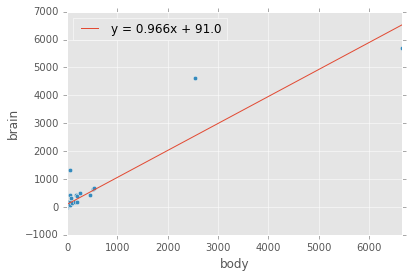

In [6]:
df.columns = ['animal', 'body', 'brain']

def LinearRegression(dataframe):
    df = dataframe
    column_names = df.columns.values
    column_name = ', '.join(column_names)

    x_input = raw_input('Select X value from columns [%s]: ' % column_name)
    if not x_input.lower() in column_names:
        sys.exit("not a column value......end")

    y_input = raw_input('Select Y value from columns [%s]: ' % column_name)
    if not y_input.lower() in column_names:
        sys.exit("not a column value......end")

    x_value = x_input.lower()
    y_value = y_input.lower()

    mean_x = float(sum(df[x_value])/ len(df[x_value]))
    mean_y = float(sum(df[y_value])/ len(df[y_value]))

    df['X-mean_x'] = df[x_value] - mean_x
    df['Y-mean_y'] = df[y_value] - mean_y
    df['X-mean_x * Y-mean_y'] = df['X-mean_x'] * df['Y-mean_y']
    df['X-mean_x^2'] = df['X-mean_x']  * df['X-mean_x']
    slope = float(sum(df['X-mean_x * Y-mean_y'])/sum(df['X-mean_x^2']))
    intercept = float((mean_y - slope*mean_x))

    equation = ("y = %sx + %s" % (round(slope, 3), round(intercept,2)))
    print "The least squares regression is : " + equation

    ## Plotting the line
    df['Linear Regression'] = ((slope*df[x_value])+ intercept)
    ax = df.plot(y = 'Linear Regression', x = x_value, label = equation)
    df.plot(kind = 'scatter',  y = y_value, x = x_value, ax = ax)
    plt.show()


LinearRegression(df)